In [ ]:
!pip install ultralytics


image 1/1 /content/NH033A_I__00027 (3).JPG: 384x640 1 Elephant, 1019.4ms
Speed: 16.3ms preprocess, 1019.4ms inference, 25.7ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict


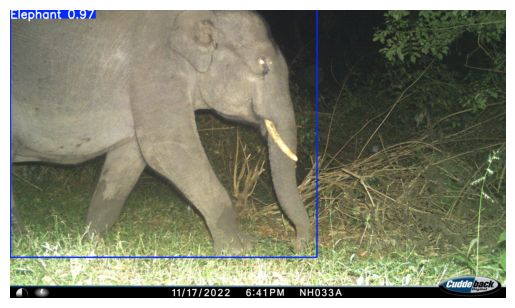

Email sent successfully!


In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
import os
import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
from email.mime.base import MIMEBase
from email import encoders

# Email configuration function
def send_email(subject, body, to_email, image_path):
    from_email = 'dhruvanil888@gmail.com'
    from_password = 'vxhb tqjk mfyi pagp'  # It's better to use an App Password

    message = MIMEMultipart()
    message['From'] = from_email
    message['To'] = to_email
    message['Subject'] = subject

    message.attach(MIMEText(body, 'plain'))

    with open(image_path, 'rb') as attachment:
        mime_base = MIMEBase('application', 'octet-stream')
        mime_base.set_payload(attachment.read())
        encoders.encode_base64(mime_base)
        mime_base.add_header('Content-Disposition', f'attachment; filename={os.path.basename(image_path)}')
        message.attach(mime_base)

    session = smtplib.SMTP('smtp.gmail.com', 587)
    session.starttls()
    session.login(from_email, from_password)
    text = message.as_string()
    session.sendmail(from_email, to_email, text)
    session.quit()

    print("Email sent successfully!")

# Load pre-trained model
model = YOLO('best.pt')

# Specify the path to your image
source = '/content/NH054B_I__00010 (4).JPG'  # Replace with the actual path

# Run inference on the source
results = model(source=source, conf=0.6, save=True)

# Access the first result in the list
result = results[0]

# Display the image with bounding boxes using matplotlib
output_path = os.path.join(result.save_dir, 'NH033A_I__00027 (3).JPG')  # Path to the saved image
img = cv2.imread(output_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for matplotlib
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()

# Get the detected classes
detected_classes = [model.names[int(cls)] for cls in result.boxes.cls]

# List of classes to trigger email alerts
alert_classes = ['tiger', 'Elephant', 'leopard']

# Check if any of the alert classes are detected
if any(animal in detected_classes for animal in alert_classes):
    # Construct the email
    subject = "Alert: Animal Detected"
    body = f"One of the alert animals ({', '.join(detected_classes)}) has been detected. See the attached image."
    to_email = 'medhamaheshm.cd22@rvce.edu.in'  # Replace with the recipient's email

    # Send the email with the detected image
    send_email(subject, body, to_email, output_path)



image 1/1 /content/19_BP_L5_c055a_P523_jpg.rf.ab9dd63d17eec0576d7fe3db73b9cb0d.jpg: 640x640 1 Leopard, 2611.4ms
Speed: 9.9ms preprocess, 2611.4ms inference, 27.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


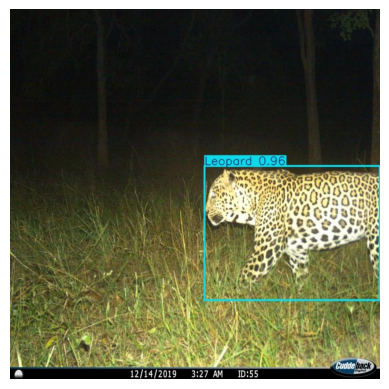

In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
import os

# Load pre-trained model
model = YOLO('best.pt')

# Specify the path to your image
source = '/content/19_BP_L5_c055a_P523_jpg.rf.ab9dd63d17eec0576d7fe3db73b9cb0d.jpg'  # Replace with the actual path

# Run inference on the source
results = model(source=source, conf=0.6, save=True)

# Access the first (and likely only) result in the list
result = results[0]

# Display the image with bounding boxes using matplotlib
output_path = os.path.join(result.save_dir, '19_BP_L5_c055a_P523_jpg.rf.ab9dd63d17eec0576d7fe3db73b9cb0d.jpg')  # Path to the saved image
img = cv2.imread(output_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for matplotlib
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()



image 1/1 /content/19_BP_L5_c055a_P523_jpg.rf.ab9dd63d17eec0576d7fe3db73b9cb0d.jpg: 640x640 1 Leopard, 5277.3ms
Speed: 5.6ms preprocess, 5277.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict7


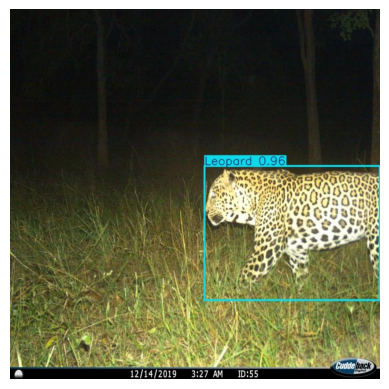

In [ ]:
# Assuming 'result' contains the identified class and 'image_path' contains the path to the image
identified_class = 'tiger'  # Example class
image_path = '/path/to/your/image.jpg'  # Path to the image you want to attach

# List of classes to trigger email alerts
alert_classes = ['tiger', 'elephant', 'leopard']

if identified_class in alert_classes:
    subject = f"Alert: {identified_class.capitalize()} Detected"
    body = f"A {identified_class} has been detected by the system. Please find the attached image for reference."
    to_email = 'recipient_email@gmail.com'  # Replace with the recipient's email

    # Send the email
    send_email(subject, body, to_email, image_path)


In [ ]:
import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
from email.mime.base import MIMEBase
from email import encoders
import os

def send_email(subject, body, to_email, image_path):
    # Email configuration
    from_email = 'dhruvanil888@gmail.com'
    from_password = '4gonemad'  # It's better to use an App Password for this

    # Setting up the MIME
    message = MIMEMultipart()
    message['From'] = from_email
    message['To'] = to_email
    message['Subject'] = subject

    # Attaching the body with the message instance
    message.attach(MIMEText(body, 'plain'))

    # Open the image file to attach
    with open(image_path, 'rb') as attachment:
        mime_base = MIMEBase('application', 'octet-stream')
        mime_base.set_payload(attachment.read())
        encoders.encode_base64(mime_base)
        mime_base.add_header('Content-Disposition', f'attachment; filename={os.path.basename(image_path)}')
        message.attach(mime_base)

    # Create SMTP session for sending the email
    session = smtplib.SMTP('smtp.gmail.com', 587)  # Use Gmail's SMTP server
    session.starttls()  # Enable security
    session.login(from_email, from_password)  # Login with your credentials

    # Convert the message to a string and send it
    text = message.as_string()
    session.sendmail(from_email, to_email, text)
    session.quit()

    print("Email sent successfully!")
